<font face="微軟正黑體">

## Related Articles

- [How to Use Statistics to Identify Outliers in Data](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

- [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

### How to Use Statistics to Identify Outliers in Data

#### Standard Deviation Method
* the distribution of values in the sample is Gaussian or Gaussian-like
* 3 Standard Deviations from the Mean: 99.7%

#### Interquartile Range Method
* statistic for summarizing a non-Gaussian distribution sample of data
* a factor k of the IQR below the 25th percentile or above the 75th percentile

In [1]:
from numpy import random, mean, std, percentile

def generate_data():
    random.seed(1)
    return 5 * random.randn(10000) + 50

def identify_outliers(data, lower, upper):
    outliers = [x for x in data if x < lower or x > upper]
    non_outliers = [x for x in data if x >= lower and x <= upper]
    
    print('Identified outliers: %d' % len(outliers))
    print('Non-outlier observations: %d' % len(non_outliers))

In [2]:
# Standard Deviation Method
data = generate_data()
data_mean, data_std = mean(data), std(data)

lower, upper = data_mean - data_std * 3, data_mean + data_std * 3
print("mean: {:.2f}, std: {:.2f}, lower: {:.2f}, upper: {:.2f}".format(data_mean, data_std, lower, upper))

identify_outliers(data, lower, upper)

mean: 50.05, std: 4.99, lower: 35.07, upper: 65.03
Identified outliers: 29
Non-outlier observations: 9971


In [3]:
# Interquartile Range Method
data = generate_data()
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25

lower, upper = q25 - iqr * 1.5, q75 + iqr * 1.5
print("q25: {:.2f}, q75: {:.2f}, lower: {:.2f}, upper: {:.2f}".format(q25, q75, lower, upper))

identify_outliers(data, lower, upper)

q25: 46.69, q75: 53.36, lower: 36.67, upper: 63.37
Identified outliers: 81
Non-outlier observations: 9919


<font face="微軟正黑體">

## 檢視 Outliers

### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

### [教學目標]
我們已經學過統計值與直方圖, 試著用這些工具尋找與觀察可能的離群值

### [範例重點]
- 使用統計值與直方圖, 觀察離群值 (In[3], Out[3], In[4], Out[4])
- 將疑似離群值的資料移除後, 看看剩餘的資料是否正常 (In[6], Out[6], In[7], Out[7])

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

dir_data = '../data/'
csv_file = "application_train.csv"

In [5]:
f_app = os.path.join(dir_data, csv_file)
print('Path of read in data: %s' % (f_app))

app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<font face="微軟正黑體">

### 開始檢視不同欄位是否有異常值

- DAYS_BIRTH: 客戶申請貸款時的年齡
- DAYS_EMPLOYED: 申請貸款前，申請人已在現職工作的時間

In [6]:
print("DAYS_BIRTH info")
print((app_train['DAYS_BIRTH'] / -365).iloc[:10])
print()

print("DAYS_BIRTH describe")
print((app_train['DAYS_BIRTH'] / -365).describe())

DAYS_BIRTH info
0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
5    46.413699
6    37.747945
7    51.643836
8    55.065753
9    39.641096
Name: DAYS_BIRTH, dtype: float64

DAYS_BIRTH describe
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64


<font face="微軟正黑體">

### 從下面的圖與數值可以看出, 365243 顯然是個奇怪的數值

In [7]:
print("DAYS_EMPLOYED info")
print(app_train['DAYS_EMPLOYED'].iloc[:10])
print()

print("DAYS_EMPLOYED describe")
print(app_train['DAYS_EMPLOYED'].describe())

DAYS_EMPLOYED info
0      -637
1     -1188
2      -225
3     -3039
4     -3038
5     -1588
6     -3130
7      -449
8    365243
9     -2019
Name: DAYS_EMPLOYED, dtype: int64

DAYS_EMPLOYED describe
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


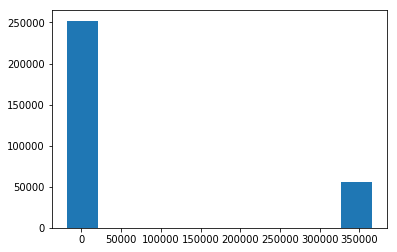

In [8]:
plt.hist(app_train['DAYS_EMPLOYED'])
plt.show()

<font face="微軟正黑體">

### 判斷 anomalous data 的貸款結果，並處理 outliers

- 新增一個欄位: DAYS_EMPLOYED_ANOM 來標記 DAYS_EMPLOYED 是否異常
- 這邊我們用 nan 將異常值取代

In [9]:
condition = app_train['DAYS_EMPLOYED'] == 365243
anom = app_train[condition]
non_anom = app_train[~condition]

print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))

print('There are %d anomalous days of employment' % len(anom))
print('There are %0.2f anomalous percent of data' % (100 * len(anom) / len(app_train)))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment
There are 18.01 anomalous percent of data


False    252137
True      55374
Name: DAYS_EMPLOYED_ANOM, dtype: int64


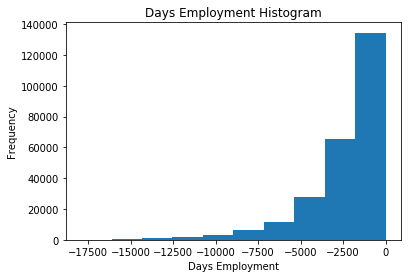

In [10]:
app_train['DAYS_EMPLOYED_ANOM'] = condition
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

print(app_train['DAYS_EMPLOYED_ANOM'].value_counts())
plt.show()

<font face="微軟正黑體">

### 檢查 OWN_CAR_AGE: 貸款人的車齡

#### 從下面我們可以發現，車齡為 64, 65 的人特別多，是否合理?
* 從圖表中推測，outliers 可能為車齡大於 50

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64


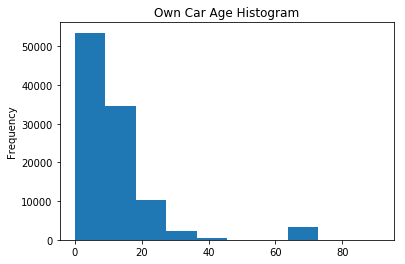

In [11]:
print(app_train.OWN_CAR_AGE.describe())

app_train.OWN_CAR_AGE[~app_train.OWN_CAR_AGE.isnull()].plot.hist(title = 'Own Car Age Histogram')
plt.show()

In [12]:
print(app_train['OWN_CAR_AGE'][app_train['OWN_CAR_AGE'] > 50].value_counts())

64.0    2443
65.0     891
54.0      12
55.0       4
51.0       3
91.0       2
63.0       2
57.0       1
69.0       1
52.0       1
56.0       1
Name: OWN_CAR_AGE, dtype: int64


<font face="微軟正黑體">

### 判斷 anomalous data 的貸款結果，並處理 outliers

- 記得，這沒有正確答案 - 但我們總是可以給他們一些標記，讓最後的模型來決定

In [15]:
print("Target of OWN_CAR_AGE >= 50: %.2f%%" % (app_train['TARGET'][app_train['OWN_CAR_AGE'] >= 50].mean() * 100 ))
print("Target of OWN_CAR_AGE < 50: %.2f%%" % (app_train['TARGET'][app_train['OWN_CAR_AGE'] < 50].mean() * 100))

app_train['OWN_CAR_AGE_ANOM'] = app_train['OWN_CAR_AGE'] >= 50

Target of OWN_CAR_AGE >= 50: 8.36%
Target of OWN_CAR_AGE < 50: 7.21%
